In [4]:
import requests

api_key = "2922d8739fd6a94a776a87bf3952d1b3"  # 替换为你的 TMDB API 密钥
url = f"https://api.themoviedb.org/3/movie/popular?api_key={api_key}"

response = requests.get(url)
movies = response.json()["results"]
for movie in movies:
    print(movie["title"])

Inside Out 2
Kingdom of the Planet of the Apes
Bad Boys: Ride or Die
Under Paris
Godzilla x Kong: The New Empire
Inside Out
The Roundup: No Way Out
Civil War
Alienoid: Return to the Future
Atlas
Tarot
Hit Man
The Fall Guy
Bad Boys for Life
Bionic
Kung Fu Panda 4
The Last Kumite
Furiosa: A Mad Max Saga
Baki Hanma VS Kengan Ashura
Battle Over Britain


In [3]:
response.json()

{'page': 1,
 'results': [{'adult': False,
   'backdrop_path': '/stKGOm8UyhuLPR9sZLjs5AkmncA.jpg',
   'genre_ids': [16, 10751, 18, 12, 35],
   'id': 1022789,
   'original_language': 'en',
   'original_title': 'Inside Out 2',
   'overview': "Teenager Riley's mind headquarters is undergoing a sudden demolition to make room for something entirely unexpected: new Emotions! Joy, Sadness, Anger, Fear and Disgust, who’ve long been running a successful operation by all accounts, aren’t sure how to feel when Anxiety shows up. And it looks like she’s not alone.",
   'popularity': 4974.9,
   'poster_path': '/vpnVM9B6NMmQpWeZvzLvDESb2QY.jpg',
   'release_date': '2024-06-11',
   'title': 'Inside Out 2',
   'video': False,
   'vote_average': 7.636,
   'vote_count': 143},
  {'adult': False,
   'backdrop_path': '/fqv8v6AycXKsivp1T5yKtLbGXce.jpg',
   'genre_ids': [878, 12, 28],
   'id': 653346,
   'original_language': 'en',
   'original_title': 'Kingdom of the Planet of the Apes',
   'overview': "Severa

In [4]:
movies_data = []

for movie in movies:
    movie_id = movie["id"]
    title = movie["title"]

    # 获取详细信息，包括导演和演员
    details_url = f"https://api.themoviedb.org/3/movie/{movie_id}?api_key={api_key}&append_to_response=credits"
    details_response = requests.get(details_url)
    details = details_response.json()

    directors = [
        member["name"]
        for member in details["credits"]["crew"]
        if member["job"] == "Director"
    ]
    actors = [member["name"] for member in details["credits"]["cast"]]

    movies_data.append({"title": title, "directors": directors, "actors": actors})

In [5]:
details

{'adult': False,
 'backdrop_path': '/11G6N5zW0KykVS0EcNKeXHUmQj8.jpg',
 'belongs_to_collection': None,
 'budget': 0,
 'genres': [{'id': 10752, 'name': 'War'}],
 'homepage': 'https://kaleidoscopefilmdistribution.com/films/battle-over-britain/',
 'id': 1136318,
 'imdb_id': 'tt18829674',
 'origin_country': ['GB'],
 'original_language': 'en',
 'original_title': 'Battle Over Britain',
 'overview': 'A young pilot, fresh out of training, is called to join a Flight while they wait for the call to scramble. Throughout a single day, he witnesses the skies of southern England filled with deadly dog fights, and after every exhausting battle the men return to their dispersal hut, only to find another of their number missing. Unwilling to surrender, the pilot and his comrades unite to take to the skies once more, determined to defend not only the airfield, but their entire country.',
 'popularity': 758.69,
 'poster_path': '/8htJ7keZTwa08aC9OKyiqaq1cNJ.jpg',
 'production_companies': [{'id': 95706,
  

In [6]:
entities = set()
relationships = []

for movie in movies_data:
    movie_title = movie["title"]
    entities.add(movie_title)

    for director in movie["directors"]:
        entities.add(director)
        relationships.append((movie_title, "directed_by", director))

    for actor in movie["actors"]:
        entities.add(actor)
        relationships.append((movie_title, "acted_in", actor))

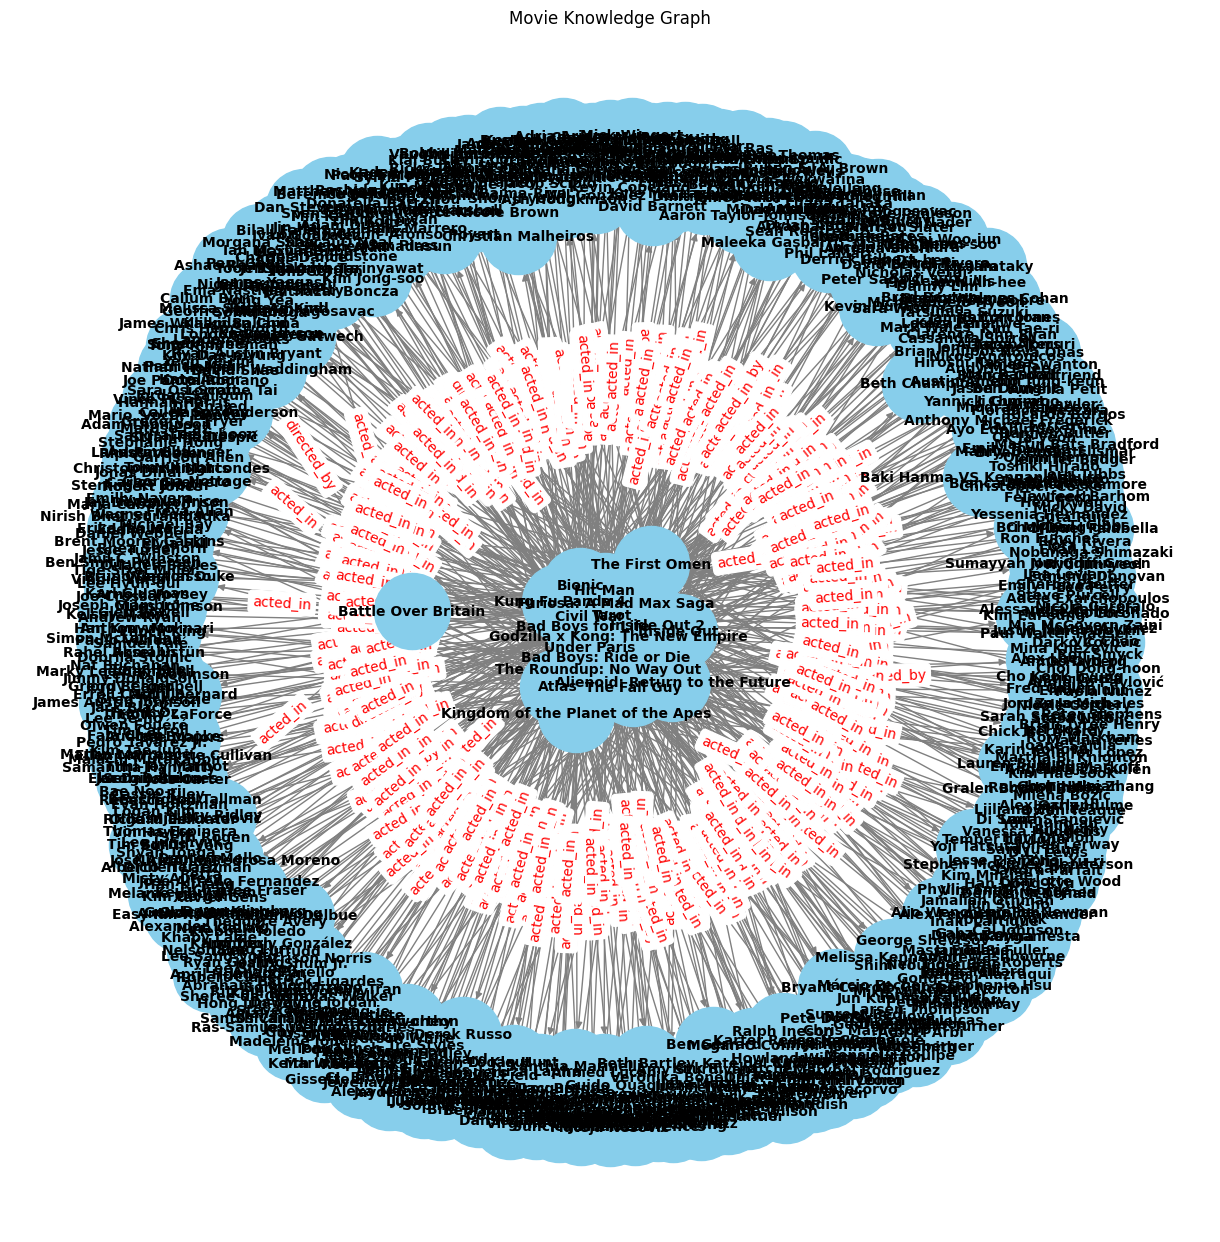

In [7]:
import networkx as nx
import matplotlib.pyplot as plt

# 创建有向图
G = nx.DiGraph()

# 添加节点
for entity in entities:
    G.add_node(entity)

# 添加边（关系）
for relationship in relationships:
    G.add_edge(relationship[0], relationship[2], label=relationship[1])